In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



Matplotlib is building the font cache; this may take a moment.


In [2]:
# Step 2: Create the DataFrame
data = {
    'Hours': [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],
    'Scores': [20, 25, 30, 35, 45, 50, 55, 60, 65, 70]
}
df = pd.DataFrame(data)

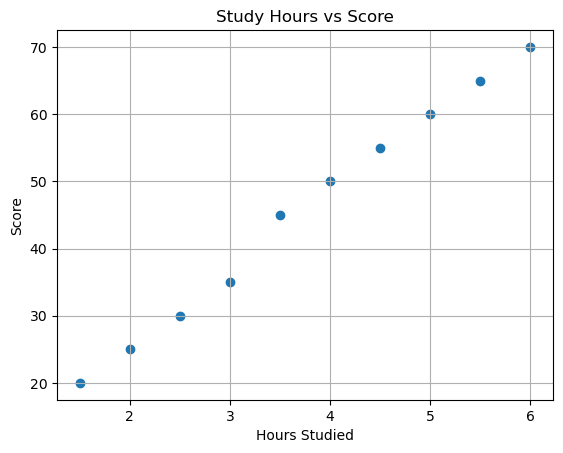

In [3]:
# Step 3: Visualize the Data
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Study Hours vs Score")
plt.grid(True)
plt.show()

In [4]:
# Step 4: Split Data
X = df[['Hours']]  # Feature matrix
y = df['Scores']   # Target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Step 5: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
#Display Model Coefficients:

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Regression Equation: Score = {model.coef_[0]:.2f} * Hours + {model.intercept_:.2f}")

Intercept: 2.857142857142847
Coefficient: 11.42857142857143
Regression Equation: Score = 11.43 * Hours + 2.86


In [6]:
#  Make Predictions
y_pred = model.predict(X_test)

In [7]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.275510204081631
R-squared Score: 0.9958350687213661


In [11]:
# Evaluate the model using MAE:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 1.071428571428573


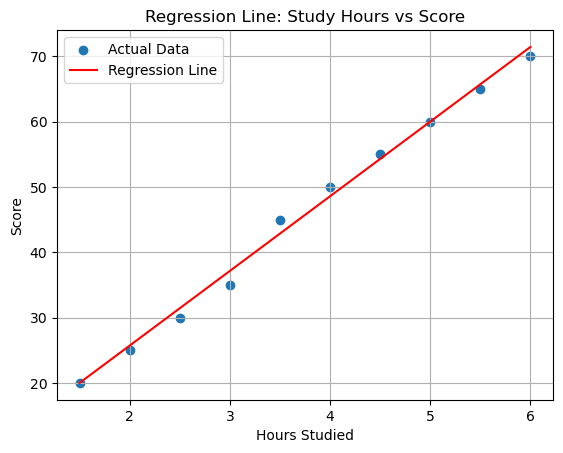

In [8]:
# Step 8: Plot Regression Line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Regression Line: Study Hours vs Score")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# confidence interval for Predictions:

import statsmodels.api as sm
X_const = sm.add_constant(X)
model_stats = sm.OLS(y, X_const).fit()
print(model_stats.summary())


                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1323.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           3.58e-10
Time:                        14:21:20   Log-Likelihood:                -16.652
No. Observations:                  10   AIC:                             37.30
Df Residuals:                       8   BIC:                             37.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5455      1.265      2.013      0.0

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
#Comparison DataFrame
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison)


   Actual  Predicted
0      30  31.428571
1      65  65.714286


In [9]:
# Step 9: Predict for New Data
hours = [[7.5]]
predicted_score = model.predict(hours)
print(f"Predicted Score for 7.5 hours of study: {predicted_score[0]:.2f}")

Predicted Score for 7.5 hours of study: 88.57


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# Interactive Inputs :
hrs = float(input("Enter hours studied: "))
print(f"Predicted Score: {model.predict([[hrs]])[0]:.2f}")


Enter hours studied: 3.7
Predicted Score: 45.14


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
